In this notebook, I am cleaning the attendance dataset as well as conducting elementary analysis to gain surface level insights and develop an intuition of the data. Here, I hope this provides insight for you to see how I was thinking and progressing throughout my data cleaning and analysis process

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns; sns.set()

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import math

#this will mute errors that made your final pdf less legible
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Cityspace_Attendance_Updated.csv')

In [ ]:
df.columns

Index(['Date', 'Event', 'Registrations', 'All_Attendance', 'Livestream',
       'Room Capacity', 'Category', 'Guest_Speaker', 'in_person', 'Genres'],
      dtype='object')

In [ ]:
df['Category'].value_counts()

Category
Food                       39
Conversation               27
Social                     25
Town Hall                  20
Moth StorySLAM             19
Politics                   16
Live                       16
Sound On                   15
Screening                  14
Climate                    13
Guest                      13
Health                     11
Boston                     10
Science                     8
Ones to Watch               8
Journalism                  8
Mega Awesome                7
Phenomenal Women            6
Here & Now                  5
Tell Me More                5
Radio Boston                5
This Changes Everything     5
Celebration                 5
The Crossword Show          4
ARTery                      4
Member Night                4
Field Trip                  4
Endless Thread              4
Circle Round                4
Opera                       3
Tribute                     2
Name: count, dtype: int64

In [ ]:
category_counts = df['Category'].value_counts()

# Sum up all the counts
total_counts = category_counts.sum()

print("Total counts across all categories:", total_counts)

Total counts across all categories: 329


In [ ]:
# Cleaning Data
df.rename(columns={'All Attendance(including in-person and livestream)': 'All_Attendance'}, inplace=True) # Renaming column
df['in_person'] = df['All_Attendance'] - df['Livestream'] # Adding Column
df = df[df['Registrations'] != 0.0] # Removing rows with 0 registrations (only 3 rows)
df = df[df['All_Attendance'] != 0] # Removing rows with 0 registrations (only 3 rows)
df['Date'] = pd.to_datetime(df['Date']) # Converting the dtype of Date
df.head()

,Date,Event,Registrations,All_Attendance,Livestream,Room Capacity,Category,Guest_Speaker,in_person,Genres
0,2019-12-17,LFOD x The ARTery: State of New England Hip Hop,190.0,60,0,254,ARTery,No,60,Arts & Culture
1,2021-09-23,The ARTery 25,367.0,227,123,254,ARTery,No,104,Entertainment
2,2019-03-28,The ARTery 25,367.0,227,0,254,ARTery,No,227,Entertainment
3,2019-08-23,The ARTery's Massachusetts Favorite of the Tin...,151.0,129,0,254,ARTery,No,129,Entertainment
4,2020-07-30,Black Boston: Building Healthy Communities,402.0,146,0,254,Boston,No,146,Health & Wellness


In [ ]:
len(df)

328

In [ ]:
df = df.drop(df['Registrations'].idxmax())
df = df.drop(df['Registrations'].idxmax())

In [ ]:
top_10_registrations = df.nlargest(10, 'Registrations')
top_10_registrations

,Date,Event,Registrations,All_Attendance,Livestream,Room Capacity,Category,Guest_Speaker,in_person,Genres
33,2022-04-27,Gubernatorial forum on energy and the environment,942.0,494,388,254,Climate,No,106,Climate
318,2020-04-14,Virtual Town Hall: The Surge,772.0,343,0,254,Town Hall,No,343,Health & Wellness
260,2021-03-23,Leveling the Playing Field In STEM,540.0,296,0,254,Social,No,296,Social Issues
309,2020-06-04,Virtual Town Hall: George Floyd,513.0,296,0,254,Town Hall,No,296,Social Issues
323,2020-11-17,WBUR Town Hall: Now What? The Impact of the 20...,501.0,369,0,254,Town Hall,No,369,Politics
307,2020-04-21,Virtual Town Hall: After the Surge,498.0,353,0,254,Town Hall,No,353,Health & Wellness
5,2020-09-21,Black Boston: Changing the Face of Politics,497.0,236,0,254,Boston,No,236,Politics
314,2020-04-28,Virtual Town Hall: Prison and Homeless Populat...,477.0,313,0,254,Town Hall,No,313,Social Issues
58,2020-09-28,On Point Presents: A Conversation With Jill Le...,434.0,226,0,254,Conversation,Yes,226,Technology
266,2020-07-23,Monumental Change: Addressing The Legacies of ...,429.0,214,0,254,Social,No,214,Social Issues


In [ ]:
top_10_attendence = df.nlargest(10, 'All_Attendance')
top_10_attendence

,Date,Event,Registrations,All_Attendance,Livestream,Room Capacity,Category,Guest_Speaker,in_person,Genres
319,2021-10-21,WBUR Town Hall: Annissa Essaibi George,391.0,603,552,254,Town Hall,Yes,51,Politics
322,2021-10-18,WBUR Town Hall: Michelle Wu,414.0,533,466,254,Town Hall,Yes,67,Politics
33,2022-04-27,Gubernatorial forum on energy and the environment,942.0,494,388,254,Climate,No,106,Climate
15,2021-11-04,A Celebration of Car Talk,423.0,416,200,254,Celebration,No,216,Entertainment
217,2023-09-26,Democracy Awakening: historian Heather Cox Ric...,365.0,386,158,254,Politics,Yes,228,Politics
256,2022-04-04,How to be Peferct with the Good Place creator ...,309.0,379,213,254,Social,Yes,166,Literature
323,2020-11-17,WBUR Town Hall: Now What? The Impact of the 20...,501.0,369,0,254,Town Hall,No,369,Politics
307,2020-04-21,Virtual Town Hall: After the Surge,498.0,353,0,254,Town Hall,No,353,Health & Wellness
318,2020-04-14,Virtual Town Hall: The Surge,772.0,343,0,254,Town Hall,No,343,Health & Wellness
312,2020-06-30,Virtual Town Hall: Post-Pandemic,NaN,323,0,254,Town Hall,No,323,Health & Wellness


In [ ]:
rows_higher_attendance = df[df['All_Attendance'] > df['Registrations']]
num_rows_higher_attendance = rows_higher_attendance.shape[0]

print("Number of rows with higher value in attendance than registrations:", num_rows_higher_attendance)

Number of rows with higher value in attendance than registrations: 25


In [ ]:
rows_higher_attendance

,Date,Event,Registrations,All_Attendance,Livestream,Room Capacity,Category,Guest_Speaker,in_person,Genres
11,2019-03-18,Catching Up with Boston Marathon Winner Des Li...,95.0,96,0,254,Boston,Yes,96,Sports
42,2019-04-11,A Conversation With Pod Save America Host Jon ...,93.0,119,0,254,Conversation,Yes,119,Politics
60,2021-10-26,This Is Your Mind On Plants / Pollan,252.0,257,162,254,Conversation,No,95,Science
79,2022-11-29,Curated Cuisine: Art of the chicken with world...,258.0,260,0,254,Food,Yes,260,Food & Cuisine
135,2021-09-20,Here & Now Presents Trailblazers,66.0,72,50,254,Here & Now,No,22,Social Issues
141,2022-04-05,Newsmakers: When the police take your money an...,94.0,106,83,254,Journalism,No,23,Social Issues
142,2019-09-16,The New York Times' Anthony Tommasini: The Ind...,81.0,90,0,254,Journalism,Yes,90,Arts & Culture
147,2023-03-17,Listen Up: NPR Embedded's “Capital Gazette” wi...,5.0,171,0,254,Live,Yes,171,Social Issues
181,2023-09-12,The Moth StorySLAM: DRIVE,228.0,234,0,254,Moth StorySLAM,No,234,Entertainment
187,2023-02-07,The Moth StorySLAM: LOVE HURTS,195.0,202,0,254,Moth StorySLAM,No,202,Entertainment


In [ ]:
df['differences'] =  df['Registrations'] - df['All_Attendance']

# Calculate the average difference
average_difference = df['differences'].mean()

# Calculate the median difference
median_difference = df['differences'].median()

print("Average difference between Registrations and All_Attendance:", average_difference)
print("Median difference between Registrations and All_Attendance:", median_difference)

Average difference between Registrations and All_Attendance: 48.51692307692308
Median difference between Registrations and All_Attendance: 33.0


In [ ]:
column_data_types = df.dtypes

# If you want to specifically check the data type of a single column, you can do it like this:
# Replace 'column_name' with the name of your column
data_type_of_column = df['Date'].dtype

# Printing the data types of all columns
print(column_data_types)

# Printing the data type of a single column
print(data_type_of_column)

Date              datetime64[ns]
Event                     object
Registrations            float64
All_Attendance             int64
Livestream                 int64
Room Capacity              int64
Category                  object
Guest_Speaker             object
in_person                  int64
Genres                    object
differences              float64
dtype: object
datetime64[ns]


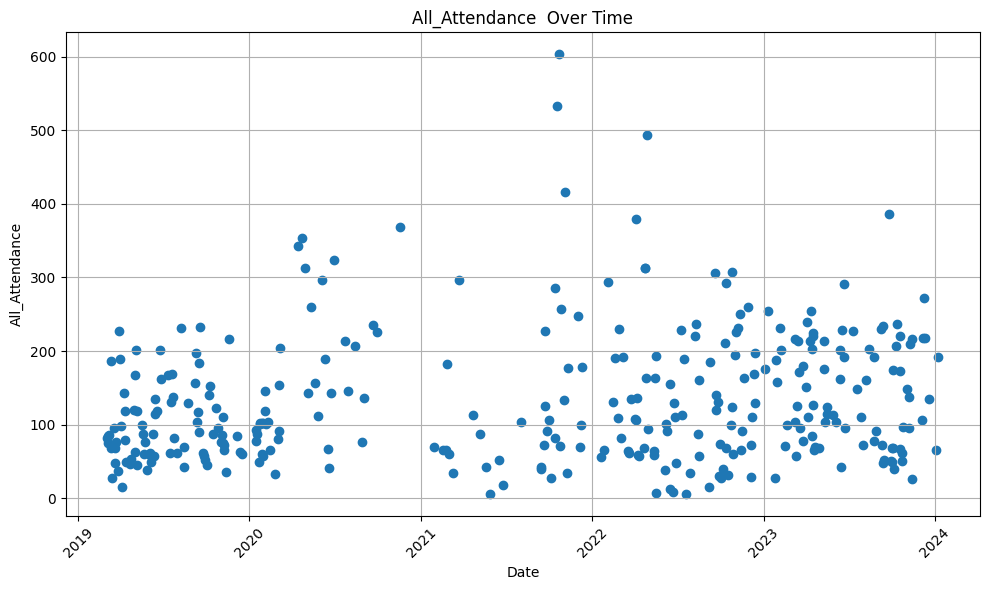

In [ ]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['All_Attendance'], marker='o')
plt.title('All_Attendance  Over Time')
plt.xlabel('Date')
plt.ylabel('All_Attendance')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
avg_attendance = df['All_Attendance'].mean()

# Median of 'All_Attendance'
median_attendance = df['All_Attendance'].median()

# Number of rows where 'All_Attendance' is above 500
rows_above_500_attendance = df[df['All_Attendance'] > 500].shape[0]

# Number of rows where 'All_Attendance' is between 400 and 500
rows_between_400_and_500_attendance = df[(df['All_Attendance'] > 400) & (df['All_Attendance'] < 500)].shape[0]

# Printing the results
print("Average of 'All_Attendance':", avg_attendance)
print("Median of 'All_Attendance':", median_attendance)
print("Number of rows where 'All_Attendance' is above 500:", rows_above_500_attendance)
print("Number of rows where 'All_Attendance' is above 400 but below 500:", rows_between_400_and_500_attendance)

# Maximum value of 'All_Attendance'
max_attendance = df['All_Attendance'].max()

# Minimum value of 'All_Attendance'
min_attendance = df['All_Attendance'].min()

# Quartile values of 'All_Attendance'
q1_attendance = df['All_Attendance'].quantile(0.25)
q2_attendance = df['All_Attendance'].quantile(0.50)  # Median
q3_attendance = df['All_Attendance'].quantile(0.75)

# Printing the results
print("Maximum value of 'All_Attendance':", max_attendance)
print("Minimum value of 'All_Attendance':", min_attendance)
print("Q1 (25th percentile) value of 'All_Attendance':", q1_attendance)
print("Q2 (Median) value of 'All_Attendance':", q2_attendance)
print("Q3 (75th percentile) value of 'All_Attendance':", q3_attendance)

Average of 'All_Attendance': 132.82208588957056
Median of 'All_Attendance': 107.5
Number of rows where 'All_Attendance' is above 500: 2
Number of rows where 'All_Attendance' is above 400 but below 500: 2
Maximum value of 'All_Attendance': 603
Minimum value of 'All_Attendance': 6
Q1 (25th percentile) value of 'All_Attendance': 67.0
Q2 (Median) value of 'All_Attendance': 107.5
Q3 (75th percentile) value of 'All_Attendance': 189.0


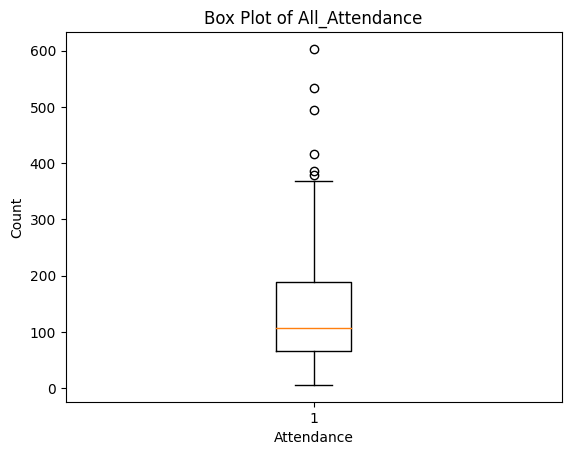

In [ ]:
data = df['All_Attendance']

# Creating the box plot
plt.boxplot(data)

# Adding labels and title
plt.xlabel('Attendance')
plt.ylabel('Count')
plt.title('Box Plot of All_Attendance')

# Displaying the plot
plt.show()

In [ ]:
total_rows = len(df)

# Average of 'Registrations'
avg_registrations = df['Registrations'].mean()

# Median of 'Registrations'
median_registrations = df['Registrations'].median()

# Number of rows where 'Registrations' is above 500
rows_above_500 = df[df['Registrations'] > 500].shape[0]

# Number of rows where 'Registrations' is between 400 and 500
rows_between_400_and_500 = df[(df['Registrations'] > 400) & (df['Registrations'] < 500)].shape[0]

# Printing the results
print("Total number of rows:", total_rows)
print("Average of 'Registrations':", avg_registrations)
print("Median of 'Registrations':", median_registrations)
print("Number of rows where 'Registrations' is above 500:", rows_above_500)
print("Number of rows where 'Registrations' is above 400 but below 500:", rows_between_400_and_500)

# Maximum value of 'Registrations'
max_registrations = df['Registrations'].max()

# Minimum value of 'Registrations'
min_registrations = df['Registrations'].min()

# Quartile values of 'Registrations'
q1_registrations = df['Registrations'].quantile(0.25)
q2_registrations = df['Registrations'].quantile(0.50)  # Median
q3_registrations = df['Registrations'].quantile(0.75)

# Printing the results
print("Maximum value of 'Registrations':", max_registrations)
print("Minimum value of 'Registrations':", min_registrations)
print("Q1 (25th percentile) value of 'Registrations':", q1_registrations)
print("Q2 (Median) value of 'Registrations':", q2_registrations)
print("Q3 (75th percentile) value of 'Registrations':", q3_registrations)

Total number of rows: 326
Average of 'Registrations': 180.75384615384615
Median of 'Registrations': 155.0
Number of rows where 'Registrations' is above 500: 5
Number of rows where 'Registrations' is above 400 but below 500: 12
Maximum value of 'Registrations': 942.0
Minimum value of 'Registrations': 5.0
Q1 (25th percentile) value of 'Registrations': 99.0
Q2 (Median) value of 'Registrations': 155.0
Q3 (75th percentile) value of 'Registrations': 240.0


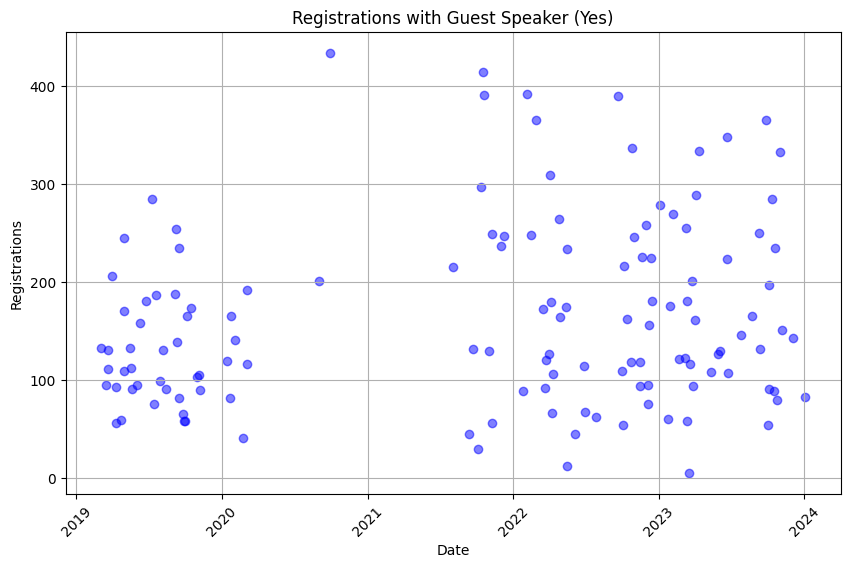

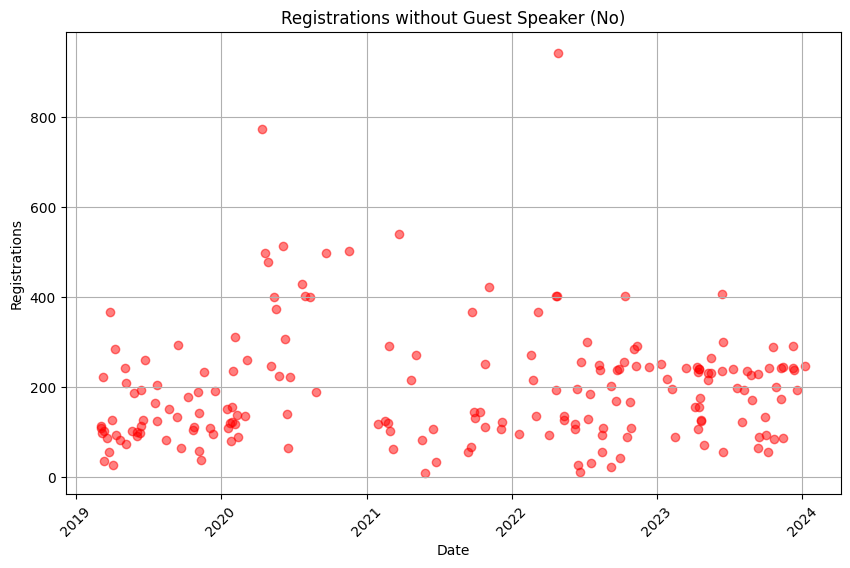

In [ ]:
yes_df = df[df['Guest_Speaker'] == 'Yes']

# Scatter plot for "Yes" values
plt.figure(figsize=(10, 6))
plt.scatter(yes_df['Date'], yes_df['Registrations'], color='blue', alpha=0.5)
plt.title('Registrations with Guest Speaker (Yes)')
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Filter DataFrame for "No" values of "Guest_Speaker"
no_df = df[df['Guest_Speaker'] == 'No']

# Scatter plot for "No" values
plt.figure(figsize=(10, 6))
plt.scatter(no_df['Date'], no_df['Registrations'], color='red', alpha=0.5)
plt.title('Registrations without Guest Speaker (No)')
plt.xlabel('Date')
plt.ylabel('Registrations')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
len(yes_df)

133

In [ ]:
len(no_df)

193

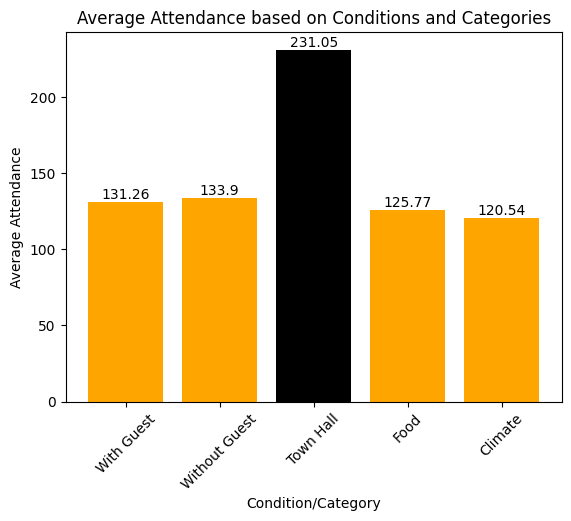

In [ ]:
with_guest_speaker = df[df['Guest_Speaker'] == 'Yes']
without_guest_speaker = df[df['Guest_Speaker'] == 'No']

# Filter the DataFrame based on categories
town_hall = df[df['Category'] == 'Town Hall']
Food = df[df['Category'] == 'Food']
climate = df[df['Category'] == 'Climate']

# Calculate the average attendance for each subset
avg_attendance_with_guest = with_guest_speaker['All_Attendance'].mean()
avg_attendance_without_guest = without_guest_speaker['All_Attendance'].mean()
avg_attendance_town_hall = town_hall['All_Attendance'].mean()
avg_attendance_Food = Food['All_Attendance'].mean()
avg_attendance_climate = climate['All_Attendance'].mean()

# Plotting the bar chart
categories = ['With Guest', 'Without Guest', 'Town Hall', 'Food', 'Climate']
avg_attendance = [avg_attendance_with_guest, avg_attendance_without_guest, avg_attendance_town_hall, avg_attendance_Food, avg_attendance_climate]

plt.bar(categories, avg_attendance, color=['orange', 'orange', 'black', 'orange', 'orange'])
plt.xlabel('Condition/Category')
plt.ylabel('Average Attendance')
plt.title('Average Attendance based on Conditions and Categories')

# Adding values on top of the bars
for i in range(len(categories)):
    plt.text(categories[i], avg_attendance[i], str(round(avg_attendance[i], 2)), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

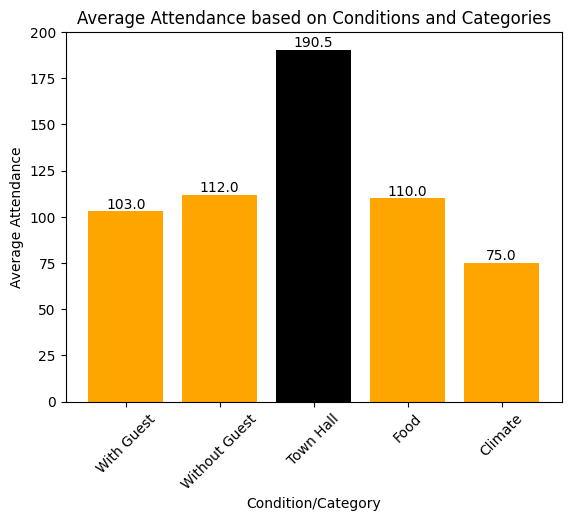

In [ ]:
# Same as above but MEDIAN instead of avg

# Calculate the median attendance for each subset
med_attendance_with_guest = with_guest_speaker['All_Attendance'].median()
med_attendance_without_guest = without_guest_speaker['All_Attendance'].median()
med_attendance_town_hall = town_hall['All_Attendance'].median()
med_attendance_Food = Food['All_Attendance'].median()
med_attendance_climate = climate['All_Attendance'].median()

# Plotting the bar chart
categories = ['With Guest', 'Without Guest', 'Town Hall', 'Food', 'Climate']
med_attendance = [med_attendance_with_guest, med_attendance_without_guest, med_attendance_town_hall, med_attendance_Food, med_attendance_climate]

plt.bar(categories, med_attendance, color=['orange', 'orange', 'black', 'orange', 'orange'])
plt.xlabel('Condition/Category')
plt.ylabel('Average Attendance')
plt.title('Average Attendance based on Conditions and Categories')

# Adding values on top of the bars
for i in range(len(categories)):
    plt.text(categories[i], med_attendance[i], str(round(med_attendance[i], 2)), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

In [ ]:
df

,Date,Event,Registrations,All_Attendance,Livestream,Room Capacity,Category,Guest_Speaker,in_person,Genres,differences
0,2019-12-17,LFOD x The ARTery: State of New England Hip Hop,190.0,60,0,254,ARTery,No,60,Arts & Culture,130.0
1,2021-09-23,The ARTery 25,367.0,227,123,254,ARTery,No,104,Entertainment,140.0
2,2019-03-28,The ARTery 25,367.0,227,0,254,ARTery,No,227,Entertainment,140.0
3,2019-08-23,The ARTery's Massachusetts Favorite of the Tin...,151.0,129,0,254,ARTery,No,129,Entertainment,22.0
4,2020-07-30,Black Boston: Building Healthy Communities,402.0,146,0,254,Boston,No,146,Health & Wellness,256.0
...,...,...,...,...,...,...,...,...,...,...,...
324,2021-02-23,WBUR Town Hall: The Success and Challenges of ...,120.0,66,0,254,Town Hall,No,66,Politics,54.0
325,2021-02-16,WBUR Town Hall: The Vaccine Is Here,124.0,65,0,254,Town Hall,No,65,Health & Wellness,59.0
326,2022-03-08,WBUR Town Hall: Understanding the Ukraine Crisis,367.0,192,170,254,Town Hall,No,22,Politics,175.0
327,2023-11-08,Bob Oakes Legacy,173.0,138,19,254,Tribute,No,119,Journalism & Media,35.0


In [ ]:
print(df.dtypes)

Date              datetime64[ns]
Event                     object
Registrations            float64
All_Attendance             int64
Livestream                 int64
Room Capacity              int64
Category                  object
Guest_Speaker             object
in_person                  int64
Genres                    object
differences              float64
dtype: object


In [ ]:
# Can compare livestream vs in-person

In [ ]:
# Put code below in different notebook

In [ ]:
!pip install plotly ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.0 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

avg_attendance = df.groupby('Category').agg({'All_Attendance': 'mean', 'Category': 'size'}).rename(columns={'Category': 'Event_Count'}).reset_index()

# Plot the interactive bar chart with hover template including event count
fig = px.bar(avg_attendance, x='Category', y='All_Attendance', title='Average Attendance by Category',
             hover_data={'All_Attendance': True, 'Event_Count': True},
             labels={'All_Attendance': 'Average Attendance', 'Event_Count': 'Event Count'},
             template='plotly',
             )

fig.update_traces(text=avg_attendance['All_Attendance'].round(1), textposition='outside')

# Show the plot
fig.show()


In [ ]:
df['Category'].unique()

array(['ARTery', 'Boston', 'Celebration', 'Circle Round', 'Climate',
       'Conversation', 'Endless Thread', 'Field Trip', 'Food', 'Guest',
       'Health', 'Here & Now', 'Journalism', 'Live', 'Mega Awesome',
       'Member Night', 'Moth StorySLAM', 'Ones to Watch', 'Opera',
       'Phenomenal Women', 'Politics', 'Radio Boston', 'Science',
       'Screening', 'Social', 'Sound On', 'Tell Me More',
       'The Crossword Show', 'This Changes Everything', 'Town Hall',
       'Tribute'], dtype=object)

In [ ]:
def update_plot(selected_categories):
    avg_attendance_selected = df[df['Category'].isin(selected_categories)].groupby('Category')['All_Attendance'].mean().reset_index()
    fig = px.bar(avg_attendance_selected, x='Category', y='All_Attendance', title='Average Attendance by Category')
    fig.show()

# Create checkboxes for categories
category_checkboxes = [widgets.Checkbox(description=category, value=False) for category in df['Category'].unique()]

# Function to handle checkbox change event
def checkbox_event_handler(change):
    selected_categories = [checkbox.description for checkbox in category_checkboxes if checkbox.value]
    update_plot(selected_categories)

# Bind the event handler function to the checkboxes
for checkbox in category_checkboxes:
    checkbox.observe(checkbox_event_handler, names='value')

# Display the checkboxes vertically without extra space
category_checkboxes_vbox = widgets.VBox(category_checkboxes, layout={'display': 'flex', 'flex_flow': 'column'})
display(category_checkboxes_vbox)

In [ ]:
# Initial plot with default category
update_plot([checkbox.description for checkbox in category_checkboxes if checkbox.value])

In [ ]:
def update_plot(selected_categories):
    avg_attendance_selected = df[df['Category'].isin(selected_categories)].groupby(['Category', 'Guest_Speaker']).agg({'All_Attendance': 'mean', 'Category': 'size'}).rename(columns={'Category': 'Event_Count'}).reset_index()

    fig = px.bar(avg_attendance_selected, x='Category', y='All_Attendance', color='Guest_Speaker',
                 barmode='group', title='Average Attendance by Category with Guest Speaker Comparison',
                 category_orders={"Category": ["A", "B", "C", "D"], "Guest_Speaker": ["Yes", "No"]},
                 hover_data={'All_Attendance': True, 'Event_Count': True},
                 labels={'All_Attendance': 'Average Attendance', 'Event_Count': 'Event Count'},
                 template='plotly')

    fig.update_traces(text=avg_attendance_selected['All_Attendance'].round(1), textposition='outside')

    fig.show()

# Create checkboxes for categories
category_checkboxes = [widgets.Checkbox(description=category, value=False) for category in df['Category'].unique()]

# Function to handle checkbox change event
def checkbox_event_handler(change):
    selected_categories = [checkbox.description for checkbox in category_checkboxes if checkbox.value]
    update_plot(selected_categories)

# Bind the event handler function to the checkboxes
for checkbox in category_checkboxes:
    checkbox.observe(checkbox_event_handler, names='value')

# Display the checkboxes vertically without extra space
category_checkboxes_vbox = widgets.VBox(category_checkboxes, layout={'display': 'flex', 'flex_flow': 'column'})
display(category_checkboxes_vbox)
print("\n")

In [ ]:
#df.columns

In [ ]:
#print(df.dtypes)

In [ ]:
update_plot([checkbox.description for checkbox in category_checkboxes if checkbox.value])

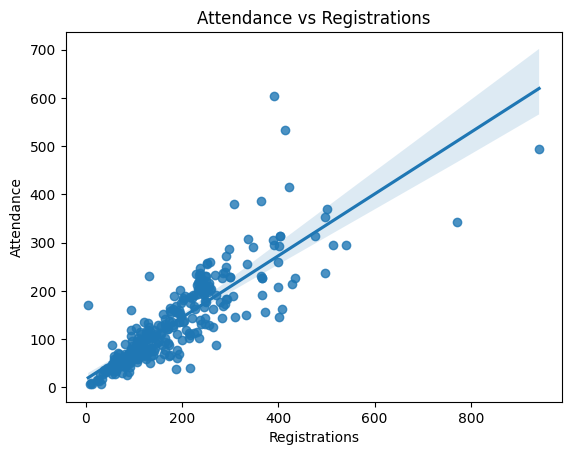

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot with Regression Line (Attendance vs Registrations)
sns.regplot(data=df, x='Registrations', y='All_Attendance')
plt.title('Attendance vs Registrations')
plt.xlabel('Registrations')
plt.ylabel('Attendance')
plt.show()



In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Create date picker widgets for selecting the start and end dates
start_date_widget = widgets.DatePicker(description='Start Date:', value=pd.to_datetime('2019-03-01'))
end_date_widget = widgets.DatePicker(description='End Date:', value=pd.to_datetime('2024-01-01'))

# Display the date picker widgets
display(start_date_widget, end_date_widget)

DatePicker(value=Timestamp('2019-03-01 00:00:00'), description='Start Date:')

DatePicker(value=Timestamp('2024-01-01 00:00:00'), description='End Date:')

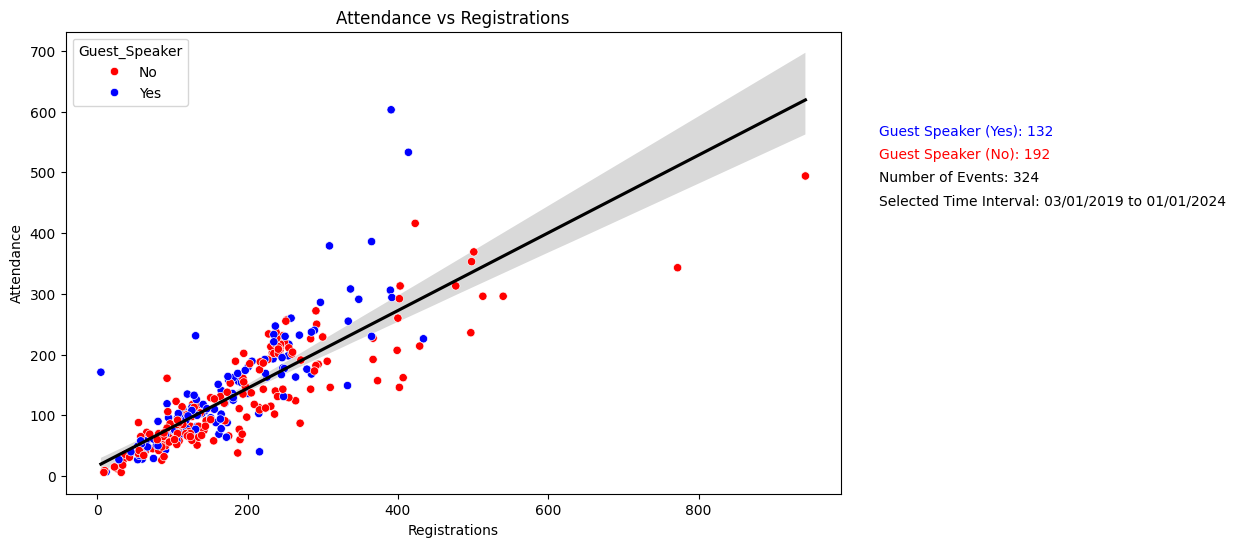

In [ ]:
# Set figure size
plt.figure(figsize=(10, 6))

# Function to update the plot based on the selected time interval
def update_plot(start_date, end_date):
    filtered_df = df[(df['Date'] >= pd.Timestamp(start_date)) & (df['Date'] <= pd.Timestamp(end_date))]
    sns.regplot(data=filtered_df, x='Registrations', y='All_Attendance', color='black', scatter=False)
    sns.scatterplot(data=filtered_df, x='Registrations', y='All_Attendance', hue='Guest_Speaker', palette={'Yes': 'blue', 'No': 'red'})
    plt.title('Attendance vs Registrations')
    plt.xlabel('Registrations')
    plt.ylabel('Attendance')

    # Convert start_date and end_date to MM/DD/YYYY format
    start_date_str = start_date.strftime('%m/%d/%Y')
    end_date_str = end_date.strftime('%m/%d/%Y')

    # Add text annotation for the Guest Speaker
    guest_speaker_counts = filtered_df['Guest_Speaker'].value_counts()
    plt.text(1.05, 0.8, f'Guest Speaker (Yes): {guest_speaker_counts.get("Yes", 0)}', transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', color='blue')
    plt.text(1.05, 0.75, f'Guest Speaker (No): {guest_speaker_counts.get("No", 0)}', transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', color='red')

    # Add text annotation for the number of events within the selected time interval
    num_events = len(filtered_df)
    plt.text(1.05, 0.7, f'Number of Events: {num_events}', transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top')

    # Add text annotation for the selected time interval with MM/DD/YYYY format
    plt.text(1.05, 0.65, f'Selected Time Interval: {start_date_str} to {end_date_str}', transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top')

    plt.show()

# Call the update_plot function with the selected dates
update_plot(start_date_widget.value, end_date_widget.value)

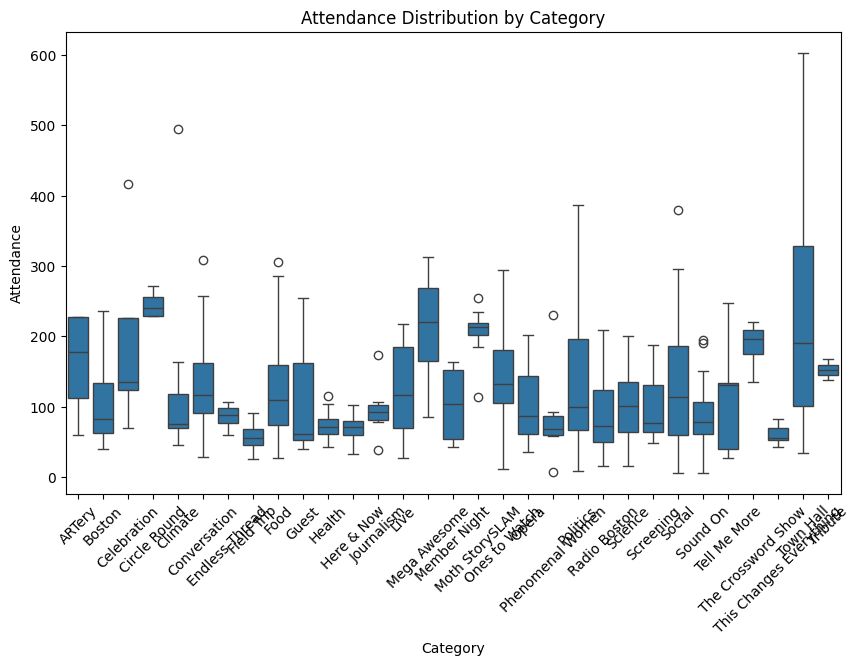

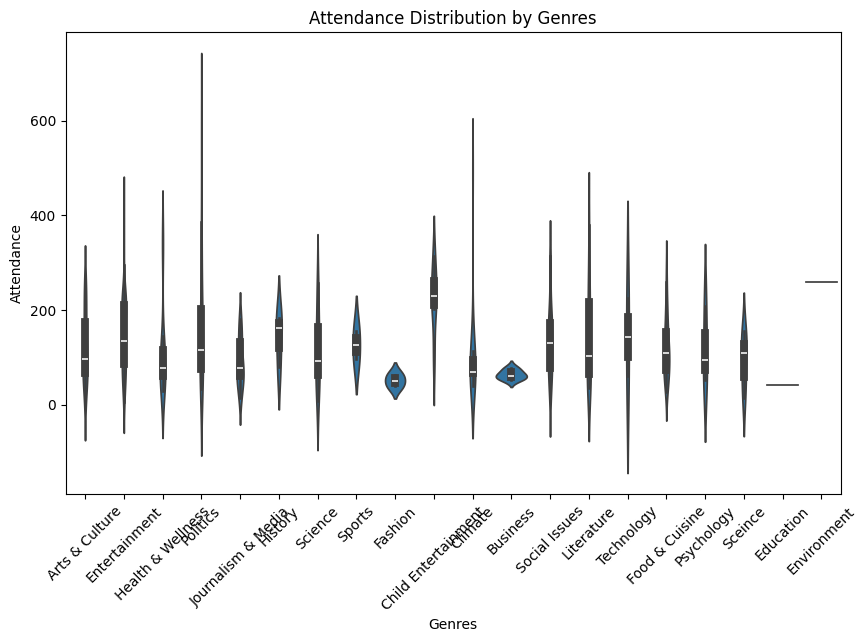

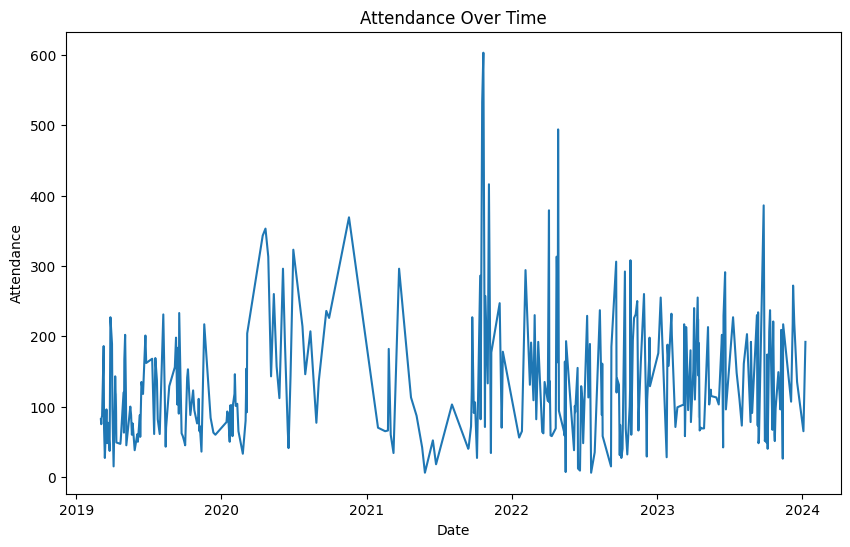

In [ ]:
# Bar Plot of Average Attendance by Livestream Presence
avg_attendance_livestream = df.groupby('Livestream')['All_Attendance'].mean().reset_index()
fig = px.bar(avg_attendance_livestream, x='Livestream', y='All_Attendance', title='Average Attendance by Livestream Presence')
fig.show()

# Box Plot of Attendance Distribution by Category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='All_Attendance')
plt.title('Attendance Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.show()

# Violin Plot of Attendance Distribution by Genres
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Genres', y='All_Attendance')
plt.title('Attendance Distribution by Genres')
plt.xlabel('Genres')
plt.ylabel('Attendance')
plt.xticks(rotation=45)
plt.show()

# Stacked Bar Chart of Attendance by Guest Speaker and Livestream Presence
avg_attendance_stacked = df.groupby(['Guest_Speaker', 'Livestream'])['All_Attendance'].mean().reset_index()
fig = px.bar(avg_attendance_stacked, x='Guest_Speaker', y='All_Attendance', color='Livestream', barmode='stack',
             title='Attendance by Guest Speaker and Livestream Presence')
fig.show()

# Line Plot of Attendance Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='All_Attendance')
plt.title('Attendance Over Time')
plt.xlabel('Date')
plt.ylabel('Attendance')
plt.show()

In [ ]:
df1 = pd.read_csv('Cityspace_Purchase.csv')
df1

FileNotFoundError: [Errno 2] No such file or directory: 'Cityspace_Purchase.csv'

In [ ]:
df2 = pd.read_csv('Cityspace_Transaction.csv')
df2